In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [2]:
forest = pd.read_csv('file.csv')

In [3]:
forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,31.8349,-83.0561,306.7,1.4,1.2,2020-01-01,324,Terra,MODIS,69,6.03,277.6,18.9,N,0
1,36.3562,-76.8050,300.2,1.2,1.1,2020-01-01,325,Terra,MODIS,20,6.03,278.9,10.2,N,0
2,33.4178,-110.8616,321.5,1.0,1.0,2020-01-01,920,Aqua,MODIS,100,6.03,271.8,24.9,N,2
3,41.4810,-90.8294,310.0,1.0,1.0,2020-01-01,1704,Terra,MODIS,69,6.03,276.5,13.8,D,0
4,38.6973,-90.1281,311.7,1.1,1.0,2020-01-01,1705,Terra,MODIS,54,6.03,282.3,14.1,D,2


In [4]:
forest.shape

(1142983, 15)

In [5]:
forest.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [6]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [7]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06,1.142983e+06
mean,3.913853e+01,-1.070444e+02,3.262148e+02,1.622374e+00,1.215345e+00,1.629392e+03,6.879698e+01,6.141689e+00,2.953958e+02,7.369909e+01,1.057986e-01
std,9.620212e+00,2.105406e+01,2.493717e+01,8.215065e-01,2.502657e-01,5.191813e+02,2.314023e+01,8.070118e-02,9.751921e+00,2.415360e+02,4.458693e-01
min,1.896860e+01,-1.739637e+02,3.000000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.030000e+00,2.645000e+02,-5.920000e+01,0.000000e+00
25%,3.283170e+01,-1.200500e+02,3.104000e+02,1.100000e+00,1.000000e+00,1.617000e+03,5.400000e+01,6.030000e+00,2.897000e+02,1.120000e+01,0.000000e+00
50%,3.751520e+01,-1.026767e+02,3.193000e+02,1.300000e+00,1.100000e+00,1.835000e+03,7.000000e+01,6.200000e+00,2.949000e+02,2.350000e+01,0.000000e+00
75%,4.354105e+01,-9.022750e+01,3.337000e+02,1.900000e+00,1.300000e+00,1.944000e+03,8.700000e+01,6.200000e+00,3.003000e+02,5.620000e+01,0.000000e+00
max,7.032110e+01,-6.700420e+01,5.070000e+02,4.800000e+00,2.000000e+00,2.359000e+03,1.000000e+02,6.200000e+00,4.001000e+02,1.614640e+04,3.000000e+00


<AxesSubplot:>

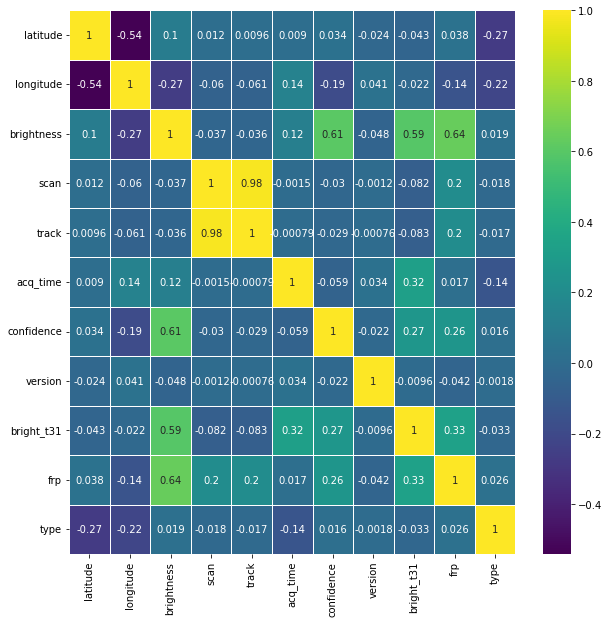

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [9]:
forest = forest.drop(['track'], axis = 1)

In [10]:
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
1.0    274107
1.1    176687
1.2    104155
1.3     76563
1.4     63228
1.5     47989
1.6     43905
1.7     34203
1.8     31207
1.9     27131
2.0     24315
2.1     20820
2.2     19144
2.3     18880
2.4     15566
2.5     14883
2.7     11613
2.8     11563
2.6     11493
2.9     10938
3.0     10817
3.1      8774
3.2      8467
3.4      7501
3.3      6566
3.8      6515
3.6      6459
3.9      5713
3.5      5558
3.7      5328
4.1      4839
4.3      4293
4.0      3848
4.4      3629
4.2      3569
4.5      3540
4.7      3528
4.6      3464
4.8      2185
Name: scan, dtype: int64

The aqc_time column
1849    11753
1901    10965
1907    10084
1913     9927
1855     8362
        ...  
1151        1
246         1
1240        1
1136        1
1227        1
Name: acq_time, Length: 1258, dtype: int64

The satellite column
Aqua     595376
Terra    547607
Name: satellite, dtype: int64

The instrument column
MODIS    1142983
Name: instrument, dtype: int64

The version column
6.20    750936
6.03 

In [11]:
forest = forest.drop(['instrument', 'version'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,31.8349,-83.0561,306.7,1.4,2020-01-01,324,Terra,69,277.6,18.9,N,0
1,36.3562,-76.8050,300.2,1.2,2020-01-01,325,Terra,20,278.9,10.2,N,0
2,33.4178,-110.8616,321.5,1.0,2020-01-01,920,Aqua,100,271.8,24.9,N,2
3,41.4810,-90.8294,310.0,1.0,2020-01-01,1704,Terra,69,276.5,13.8,D,0
4,38.6973,-90.1281,311.7,1.1,2020-01-01,1705,Terra,54,282.3,14.1,D,2


In [12]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)
forest['type'].value_counts()
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

forest = forest.drop(['type'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,1,2,3
0,31.8349,-83.0561,306.7,1.4,2020-01-01,324,1,69,277.6,18.9,0,1,0,0,0
1,36.3562,-76.8050,300.2,1.2,2020-01-01,325,1,20,278.9,10.2,0,1,0,0,0
2,33.4178,-110.8616,321.5,1.0,2020-01-01,920,0,100,271.8,24.9,0,0,0,1,0
3,41.4810,-90.8294,310.0,1.0,2020-01-01,1704,1,69,276.5,13.8,1,1,0,0,0
4,38.6973,-90.1281,311.7,1.1,2020-01-01,1705,1,54,282.3,14.1,1,0,0,1,0


In [13]:
forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

In [14]:
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,1,type_2,type_3,scan_binned
0,31.8349,-83.0561,306.7,1.4,2020-01-01,324,1,69,277.6,18.9,0,1,0,0,0,2
1,36.3562,-76.8050,300.2,1.2,2020-01-01,325,1,20,278.9,10.2,0,1,0,0,0,2
2,33.4178,-110.8616,321.5,1.0,2020-01-01,920,0,100,271.8,24.9,0,0,0,1,0,1
3,41.4810,-90.8294,310.0,1.0,2020-01-01,1704,1,69,276.5,13.8,1,1,0,0,0,1
4,38.6973,-90.1281,311.7,1.1,2020-01-01,1705,1,54,282.3,14.1,1,0,0,1,0,2


In [15]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])
forest = forest.drop(['scan'], axis = 1)
forest['year'] = forest['acq_date'].dt.year
forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,1,type_2,type_3,scan_binned,year
0,31.8349,-83.0561,306.7,2020-01-01,324,1,69,277.6,18.9,0,1,0,0,0,2,2020
1,36.3562,-76.8050,300.2,2020-01-01,325,1,20,278.9,10.2,0,1,0,0,0,2,2020
2,33.4178,-110.8616,321.5,2020-01-01,920,0,100,271.8,24.9,0,0,0,1,0,1,2020
3,41.4810,-90.8294,310.0,2020-01-01,1704,1,69,276.5,13.8,1,1,0,0,0,1,2020
4,38.6973,-90.1281,311.7,2020-01-01,1705,1,54,282.3,14.1,1,0,0,1,0,2,2020


In [16]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [17]:
forest.shape

(1142983, 18)

In [18]:
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

<AxesSubplot:>

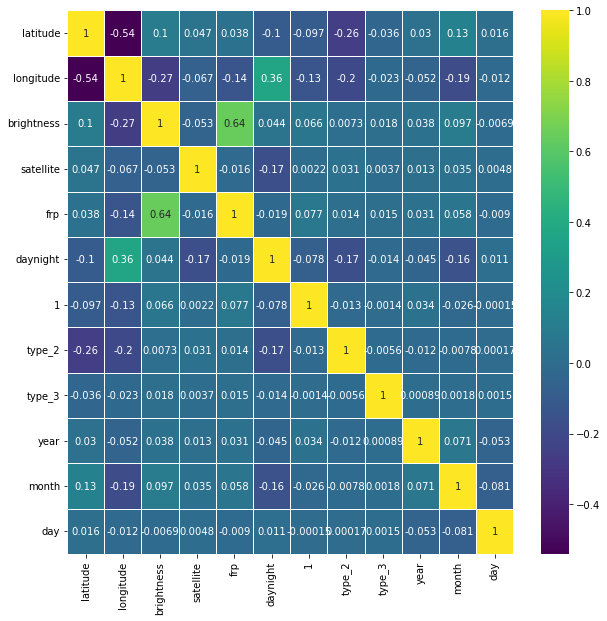

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [21]:
fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,1,type_2,type_3,scan_binned,year,month,day
0,31.8349,-83.0561,306.7,1,18.9,0,0,0,0,2,2020,1,1
1,36.3562,-76.8050,300.2,1,10.2,0,0,0,0,2,2020,1,1
2,33.4178,-110.8616,321.5,0,24.9,0,0,1,0,1,2020,1,1
3,41.4810,-90.8294,310.0,1,13.8,1,0,0,0,1,2020,1,1
4,38.6973,-90.1281,311.7,1,14.1,1,0,1,0,2,2020,1,1


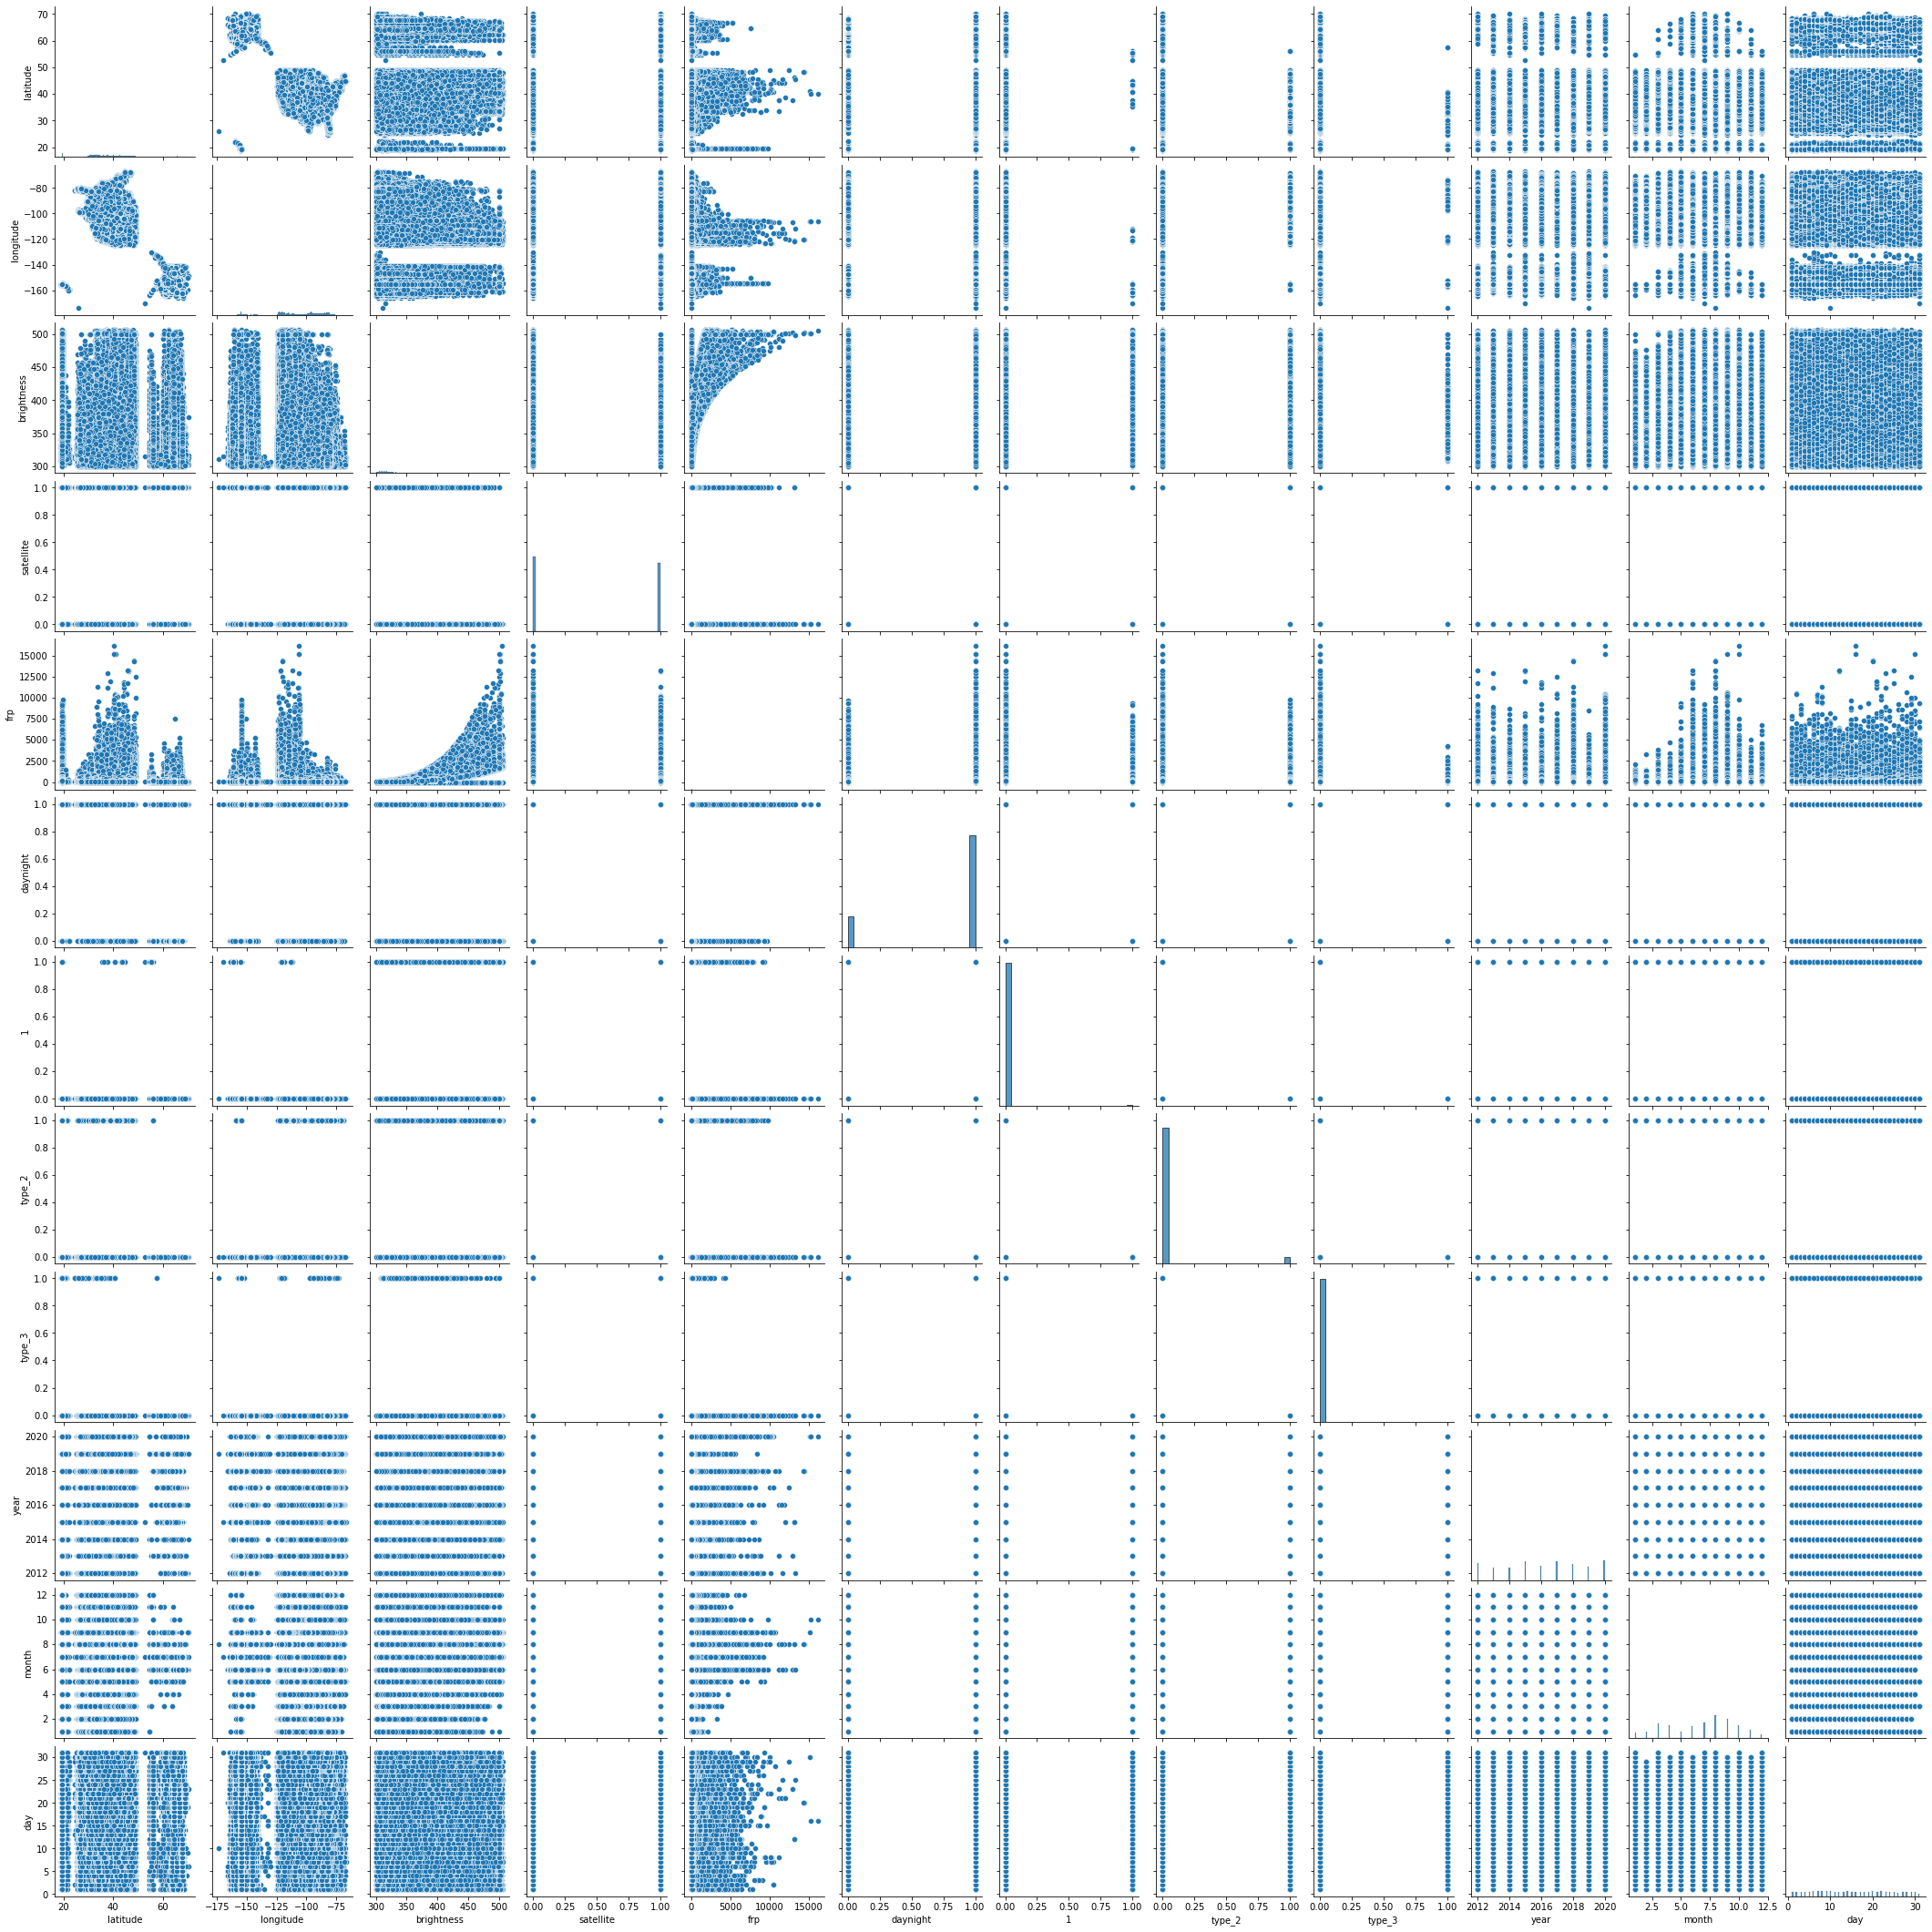

In [22]:
sns.pairplot(fin)

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

In [25]:
Xtrain.shape
ytrain.shape

(914386,)

In [24]:
Xtest.shape

(228597, 13)

In [27]:
ytest.shape

(228597,)

In [29]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.65 %


In [30]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

68.23 %


In [31]:
print(Xtest)

         latitude  longitude  brightness  satellite    frp  daynight  1  \
965098    64.0701  -146.1214       338.5          0  399.4         0  0   
628786    41.0387  -106.7482       362.0          0   87.3         1  0   
1038200   27.0511   -97.7911       328.1          1  172.5         1  0   
798732    37.9425  -120.1494       334.1          0   40.4         1  0   
392743    31.3569  -101.7807       314.1          0    7.2         1  0   
...           ...        ...         ...        ...    ...       ... ..   
579477    42.6141   -89.8603       313.4          1   18.1         1  0   
693448    32.7774   -83.6460       318.8          1    9.1         1  0   
16046     30.9409   -88.0141       304.9          1   10.7         0  0   
453741    68.3135  -141.9427       312.0          0   14.0         1  0   
817250    39.9400   -97.8943       302.0          1    5.9         1  0   

         type_2  type_3 scan_binned  year  month  day  
965098        0       0           5  2013  

In [32]:
print(ytest)

965098     100
628786     100
1038200     81
798732      67
392743      68
          ... 
579477      74
693448      34
16046       62
453741      72
817250      50
Name: confidence, Length: 228597, dtype: int64


In [33]:
print(y_pred)

[99.36333333 91.09333333 71.61666667 ... 60.94       63.89666667
 43.98666667]
